In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('openpowerlifting-2024-01-06-4c732975.csv')
data.head()

<ipython-input-3-766fc706e1f6>:1: DtypeWarning: Columns (31,33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/drive/MyDrive/openpowerlifting-2024-01-06-4c732975.csv')


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


In [ ]:
data.dropna(subset=['Squat1Kg', 'Squat2Kg', 'Squat3Kg','Sex'], inplace=True) # Drop rows where any of the specified squat/sex columns are NaN
data.dropna(subset=['Age', 'AgeClass', 'BirthYearClass'], how='all',inplace=True) # Drop rows where all of the speicified age related columns are NaN
data.dropna(subset=['BodyweightKg', 'WeightClassKg'], how='all',inplace=True)# Drop rows where all of the speicified weight related columns are NaN
data['Squat1_Success'] = (data['Squat1Kg'] > 0).astype(int)
data['Squat2_Success'] = (data['Squat2Kg'] > 0).astype(int)
data['Squat3_Success'] = (data['Squat3Kg'] > 0).astype(int)
# new columns for absolute values of squat attempts
data['Squat1_Weight_Attempted'] = data['Squat1Kg'].abs()
data['Squat2_Weight_Attempted'] = data['Squat2Kg'].abs()
data['Squat3_Weight_Attempted'] = data['Squat3Kg'].abs()
# One-Hot Encode for categorical variables
data = pd.get_dummies(data, columns=['Equipment'], drop_first=True)
data = pd.get_dummies(data, columns=['WeightClassKg'], drop_first=True)
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0,'Mx':2})

In [ ]:
def derive_age_from_ageclass(age_class):
    if pd.isna(age_class):
        return np.nan
    age_range = age_class.split('-')
    return (int(age_range[0]) + int(age_range[1])) // 2
data.loc[data['Age'].isna(), 'Age'] = data['AgeClass'].apply(derive_age_from_ageclass)
data.loc[data['Age'].isna(), 'Age'] = data['BirthYearClass'].apply(derive_age_from_ageclass)

In [ ]:
average_weights = {
    'WeightClassKg_100': 100,
    'WeightClassKg_100+': 105,
    'WeightClassKg_102': 102,
    'WeightClassKg_102+': 107,
    'WeightClassKg_102.5': 102.5,
    'WeightClassKg_104.7': 104.7,
    'WeightClassKg_104.7+': 109,
    'WeightClassKg_105': 105,
    'WeightClassKg_105+': 110,
    'WeightClassKg_109': 109,
    'WeightClassKg_109+': 115,
    'WeightClassKg_109.7': 109.7,
    'WeightClassKg_110': 110,
    'WeightClassKg_110+': 115,
    'WeightClassKg_113.5': 113.5,
    'WeightClassKg_113.5+': 118,
    'WeightClassKg_113.8': 113.8,
    'WeightClassKg_115': 115,
    'WeightClassKg_115+': 120,
    'WeightClassKg_118': 118,
    'WeightClassKg_120': 120,
    'WeightClassKg_120+': 125,
    'WeightClassKg_120.2': 120.2,
    'WeightClassKg_120.2+': 125,
    'WeightClassKg_124.7': 124.7,
    'WeightClassKg_124.7+': 130,
    'WeightClassKg_125': 125,
    'WeightClassKg_125+': 130,
    'WeightClassKg_125.1': 125.1,
    'WeightClassKg_126.8': 126.8,
    'WeightClassKg_140': 140,
    'WeightClassKg_140+': 145,
    'WeightClassKg_145': 145,
    'WeightClassKg_145+': 150,
    'WeightClassKg_155': 155,
    'WeightClassKg_155+': 160,
    'WeightClassKg_30': 30,
    'WeightClassKg_31': 31,
    'WeightClassKg_33': 33,
    'WeightClassKg_35': 35,
    'WeightClassKg_36': 36,
    'WeightClassKg_38': 38,
    'WeightClassKg_39': 39,
    'WeightClassKg_40': 40,
    'WeightClassKg_43': 43,
    'WeightClassKg_44': 44,
    'WeightClassKg_44.5': 44.5,
    'WeightClassKg_46': 46,
    'WeightClassKg_47': 47,
    'WeightClassKg_47.5': 47.5,
    'WeightClassKg_47.6': 47.6,
    'WeightClassKg_48': 48,
    'WeightClassKg_49': 49,
    'WeightClassKg_50.5': 50.5,
    'WeightClassKg_51.7': 51.7,
    'WeightClassKg_52': 52,
    'WeightClassKg_52+': 55,
    'WeightClassKg_52.5': 52.5,
    'WeightClassKg_53': 53,
    'WeightClassKg_54.4': 54.4,
    'WeightClassKg_54.8': 54.8,
    'WeightClassKg_55': 55,
    'WeightClassKg_55.5': 55.5,
    'WeightClassKg_55.7': 55.7,
    'WeightClassKg_56': 56,
    'WeightClassKg_56+': 59,
    'WeightClassKg_57': 57,
    'WeightClassKg_57+': 60,
    'WeightClassKg_58': 58,
    'WeightClassKg_58.5': 58.5,
    'WeightClassKg_59': 59,
    'WeightClassKg_59.8': 59.8,
    'WeightClassKg_60': 60,
    'WeightClassKg_60+': 63,
    'WeightClassKg_61': 61,
    'WeightClassKg_62': 62,
    'WeightClassKg_63': 63,
    'WeightClassKg_63+': 66,
    'WeightClassKg_63.5': 63.5,
    'WeightClassKg_64': 64,
    'WeightClassKg_65': 65,
    'WeightClassKg_65.7': 65.7,
    'WeightClassKg_66': 66,
    'WeightClassKg_67.1': 67.1,
    'WeightClassKg_67.5': 67.5,
    'WeightClassKg_67.5+': 70,
    'WeightClassKg_68.4': 68.4,
    'WeightClassKg_69': 69,
    'WeightClassKg_69+': 72,
    'WeightClassKg_70': 70,
    'WeightClassKg_70.3': 70.3,
    'WeightClassKg_72': 72,
    'WeightClassKg_72+': 75,
    'WeightClassKg_72.5': 72.5,
    'WeightClassKg_73': 73,
    'WeightClassKg_74': 74,
    'WeightClassKg_74+': 77,
    'WeightClassKg_74.8': 74.8,
    'WeightClassKg_75': 75,
    'WeightClassKg_75+': 78,
    'WeightClassKg_76': 76,
    'WeightClassKg_76+': 79,
    'WeightClassKg_77': 77,
    'WeightClassKg_79.3': 79.3,
    'WeightClassKg_79.5': 79.5,
    'WeightClassKg_79.8': 79.8,
    'WeightClassKg_80': 80,
    'WeightClassKg_80+': 83,
    'WeightClassKg_81.5': 81.5,
    'WeightClassKg_81.5+': 85,
    'WeightClassKg_81.6': 81.6,
    'WeightClassKg_81.6+': 85,
    'WeightClassKg_82': 82,
    'WeightClassKg_82.1': 82.1,
    'WeightClassKg_82.5': 82.5,
    'WeightClassKg_82.5+': 85,
    'WeightClassKg_83': 83,
    'WeightClassKg_83+': 86,
    'WeightClassKg_84': 84,
    'WeightClassKg_84+': 87,
    'WeightClassKg_85': 85,
    'WeightClassKg_85+': 88,
    'WeightClassKg_88': 88,
    'WeightClassKg_89.8': 89.8,
    'WeightClassKg_90': 90,
    'WeightClassKg_90+': 93,
    'WeightClassKg_90.5': 90.5,
    'WeightClassKg_90.7': 90.7,
    'WeightClassKg_90.7+': 95,
    'WeightClassKg_91.1': 91.1,
    'WeightClassKg_93': 93,
    'WeightClassKg_93+': 97,
    'WeightClassKg_93.8': 93.8,
    'WeightClassKg_94': 94,
    'WeightClassKg_95': 95,
    'WeightClassKg_99.7': 99.7,
    'WeightClassKg_99.7+': 105
}

def fill_bodyweight(row):
    if pd.notna(row['BodyweightKg']):
        return row['BodyweightKg']
    for weight_class, avg_weight in average_weights.items():
        if row[weight_class] == 1:
            return avg_weight
    return np.nan

data['BodyweightKg'] = data.apply(fill_bodyweight, axis=1)


In [ ]:
weightclass_cols = [col for col in data.columns if 'WeightClassKg' in col]
condition = data['BodyweightKg'].isna() & (data[weightclass_cols].sum(axis=1) == 0)
data.drop(index=data[condition].index, inplace=True)

In [ ]:
X_squat2 = data[['BodyweightKg', 'Age','Sex', 'Squat1_Success','Squat1_Weight_Attempted','Squat2_Weight_Attempted'] + [col for col in data.columns if 'Equipment_' in col] + [col for col in data.columns if 'WeightClassKg_' in col]]
y_squat2 = data['Squat2_Success']


XGBOOST

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
X = X_squat2
y = y_squat2
neg_count = sum(y == 0)
pos_count = sum(y == 1)
total_count = len(y)
weight_for_neg = total_count / (2 * neg_count)
weight_for_pos = total_count / (2 * pos_count)
model = XGBClassifier(
    max_depth=5,
    min_child_weight=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    learning_rate=0.01,
    n_estimators=1000
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_squat2, y_squat2, test_size=0.2, random_state=42)
sample_weights = np.where(y_train == 0, weight_for_neg, weight_for_pos)
model.fit(X_train, y_train, sample_weight=sample_weights)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Mean Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:14:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix: 
[[17383 15105]
 [41170 86194]]
Mean Accuracy: 0.6480


CV+XGBOOST

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
X = X_squat2
y = y_squat2
neg_count = sum(y == 0)
pos_count = sum(y == 1)
scale_pos_weight = neg_count / pos_count
model = XGBClassifier(max_depth=5, min_child_weight=10,scale_pos_weight=2*scale_pos_weight,random_state=42, use_label_encoder=False, eval_metric='logloss',learning_rate=0.05,n_estimators=1000)
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
all_confusion_matrices = []
all_accuracies = []
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_val)
    conf_matrix = confusion_matrix(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    all_confusion_matrices.append(conf_matrix)
    all_accuracies.append(accuracy)
mean_accuracy = np.mean(all_accuracies)
std_accuracy = np.std(all_accuracies)
print("Confusion Matrices for each fold:")
for i, cm in enumerate(all_confusion_matrices):
    print(f"Fold {i + 1}:\n{cm}\n")
print(f"Mean Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:55:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:04:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:14:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:24:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:33:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Confusion Matrices for each fold:
Fold 1:
[[16094 16453]
 [39055 88250]]

Fold 2:
[[16187 16360]
 [38995 88310]]

Fold 3:
[[16267 16280]
 [39032 88273]]

Fold 4:
[[16235 16312]
 [39156 88149]]

Fold 5:
[[16172 16375]
 [38993 88312]]

Mean Accuracy: 0.6534
Standard Deviation of Accuracy: 0.0005


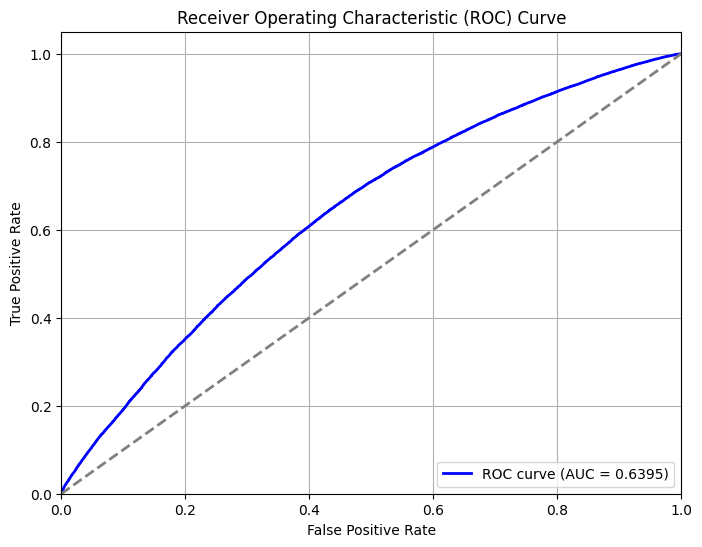

AUC: 0.6395


In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print(f"AUC: {roc_auc:.4f}")

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model_squat2 = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=10,class_weight='balanced',random_state=42)
model_squat2.fit(X_train, y_train)
y_pred = model_squat2.predict(X_test)
print("Squat2 Success Prediction:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Squat2 Success Prediction:
Accuracy: 0.6067549983734954
Confusion Matrix: 
[[19027 13461]
 [49400 77964]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.28      0.59      0.38     32488
           1       0.85      0.61      0.71    127364

    accuracy                           0.61    159852
   macro avg       0.57      0.60      0.54    159852
weighted avg       0.74      0.61      0.64    159852



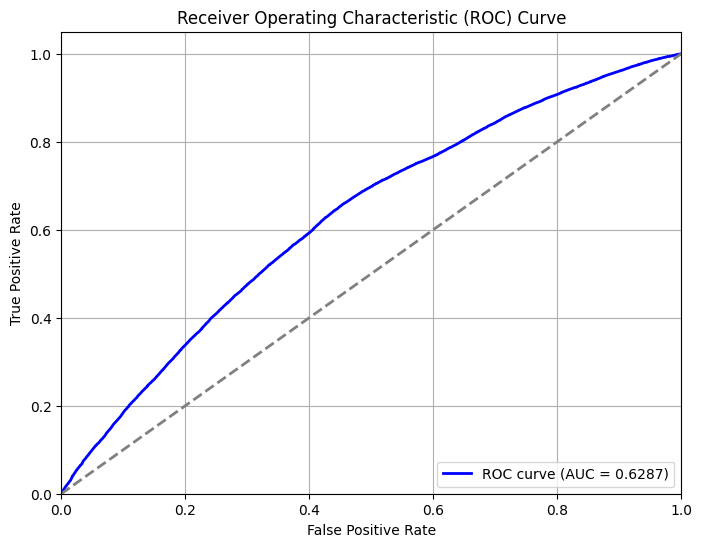

AUC: 0.6287


In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = model_squat2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print(f"AUC: {roc_auc:.4f}")